In [ ]:
import numpy as np # Númerica
import matplotlib.pyplot as plt # Gráficas
from scipy.interpolate import CubicSpline, lagrange, interp1d # Interpolación
from scipy.integrate import quad, dblquad, tplquad, trapezoid, simpson # Integración
import sympy as sp # Símbolos

# ⚠ Importante

👁 Puede usar unicamente las librerias vistas en clase (estas están en la parte superior) en caso de agregar una nueva, debe justificarla.

💀 No está permitido el uso de IA's en caso de hacerlo su parcial será **anulado**!

❗ Comente su código y funciones, esto hace parte de la nota.

✅ Responda ordenadamente y con claridad.


### Nombre: ___

# 1

**(30 puntos)** Sea la función $f(x) = 3^x$,

---

a. Defina una función llamada derivada (ver abajo) que encuentre el valor de la derivada en $x=2$ usando diferencias finitas centrales,

$$
f'(x) ≈ \frac{f(x+h) - f(x-h)}{2h}
$$

con una tolerancia menor a $10^{-8}$ y que retorne el valor de $f'(x=2)$ para cada valor de $h$. Tome con $h$ inicial 0.1.

---

b. Realice un gráfico logaritmico del error absoluto asociado a $f'(x)$ en función de $h$, conociendo que

$$
\frac{d}{dx}(b^x) = b^x\ln b
$$





```python
def derivada(f,x, tol = 1e-8):
'''
Recuerde hacer su documentación
'''

  return valor_derivada, h_valores
```



/tmp/ipython-input-32-802483491.py:55: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


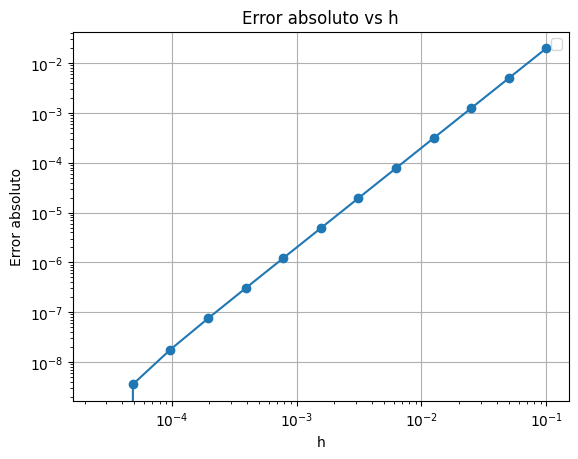

In [32]:
import numpy as np # Númerica
import matplotlib.pyplot as plt # Gráficas
from scipy.interpolate import CubicSpline, lagrange, interp1d # Interpolación
from scipy.integrate import quad, dblquad, tplquad, trapezoid, simpson # Integración
import sympy as sp # Símbolos

#a.

#funcion 3^x
def f(x):
    return 3**x

def derivada(f,x, tol=1e-8):
    '''
    la funcion calcula la derivada usando el método de diferencias finitas centrales:

    f'(x) ≈ [f(x+h) - f(x-h)] / (2h)
    '''
    h = 0.1  #valor inicial.
    derivadas=[]  #derivadas calculadas.
    valores_de_h=[]  #valores de h.

    cambio = np.inf  #cambio inicial como infinito
    derivada_anterior = 0  #valor inicial

    while cambio > tol:
        derivada_actual = (f(x + h) - f(x - h)) / (2 * h)  #fórmula de diferencias finitas centrales.

        cambio = np.abs(derivada_actual - derivada_anterior)#cambio entre esta derivada y la anterior

        derivadas.append(derivada_actual)#guardamos los valores
        valores_de_h.append(h)

        derivada_anterior = derivada_actual#actualizamos el valor anterior y reducimos h.
        h = h / 2

    return derivadas, valores_de_h
    derivada_anterior = 0  #Valor inicial

#calcular la derivada de f en x = 2
valores_derivada, valores_h = derivada(f, x=2)

# Calculamos el error absoluto entre cada valor y el último valor (más preciso)
ultimo_valor = valores_derivada[-1]
errores = [np.abs(d - ultimo_valor) for d in valores_derivada]

#b

#grafica a escala logarítmica
plt.figure()
plt.loglog(valores_h, errores, marker='o')
plt.xlabel('h')
plt.ylabel('Error absoluto')
plt.title('Error absoluto vs h')
plt.legend()
plt.grid(True)
plt.show()

## 2

**(40 puntos)** Considere un fluido viscoso que fluye en régimen laminar a través de una tubería cilíndrica horizontal de radio $R = 1.0\ \text{cm}$. Se ha medido experimentalmente la velocidad axial del fluido en distintos radios desde el centro de la tubería ($r = 0$) hasta la pared ($r = R$). Los datos obtenidos son:

| $r$ (cm) | $v(r)$ (cm/s) |
|----------|---------------|
| 0.0      | 2.00          |
| 0.2      | 1.92          |
| 0.4      | 1.68          |
| 0.6      | 1.28          |
| 0.8      | 0.72          |
| 1.0      | 0.00          |

Con base en estos datos responda:

---

**a.** Encuentre una expresión para el polinomio interpolador de **Lagrange** para $v(r)$.

---

**b.** Usando las funciones obtenidas por **Lagrange** y **CubicSpline**, haga un gráfico donde se muestre el comportamiento de ambas interpolaciones, comparándolas con los datos experimentales.

---

**c.** Calcule la derivada $\frac{dv}{dr}$, correspondiente al **gradiente de velocidad radial** usando los datos procedentes de la interpolación CubicSpline. Use `np.gradient` con $h = 10^{-4}$.

---

**d.** Determine el **esfuerzo cortante** en el fluido, dado por:

$$
\tau(r) = \mu \frac{dv}{dr},
$$

donde $\mu = 0.001\ \text{Pa}\cdot\text{s}$ es la viscosidad dinámica del fluido. Grafique $\tau(r)$ para $r \in [0, 1]$.

---



poly1d([-2.13162821e-13,  3.97903932e-13, -1.98951966e-13, -2.00000000e+00,
       -2.39808173e-14,  2.00000000e+00])

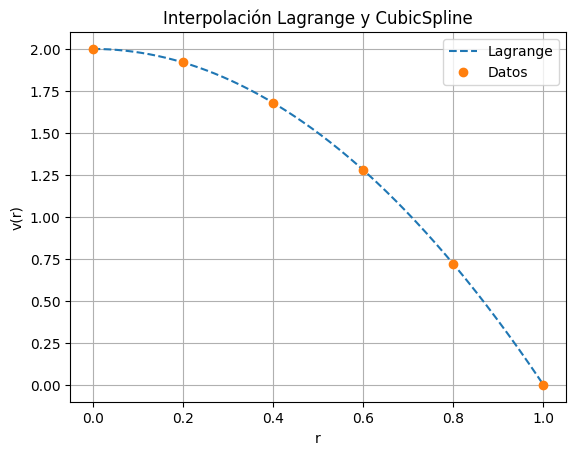

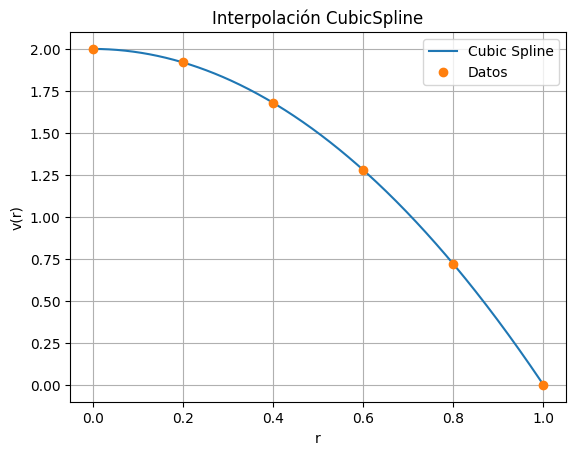

[-2.00000001e-04 -4.00000000e-04 -8.00000000e-04 ... -3.99920000e+00
 -3.99960000e+00 -3.99980000e+00]
[-2.00000001e-07 -4.00000000e-07 -8.00000000e-07 ... -3.99920000e-03
 -3.99960000e-03 -3.99980000e-03]


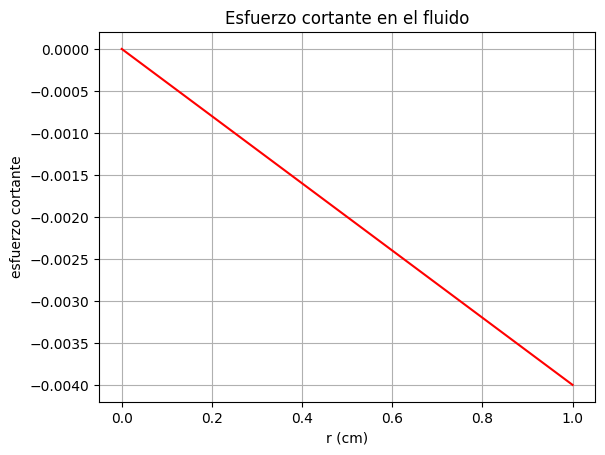

In [78]:
import numpy as np # Númerica
import matplotlib.pyplot as plt # Gráficas
from scipy.interpolate import CubicSpline, lagrange, interp1d # Interpolación
from scipy.integrate import quad, dblquad, tplquad, trapezoid, simpson # Integración
import sympy as sp # Símbolos

# a

#Datos
r_datos = np.array([0.0, 0.2, 0.4, 0.6, 0.8, 1.0])  #radios
v_datos = np.array([2.00, 1.92, 1.68, 1.28, 0.72, 0.00])  #velocidades

polinomio_lagrange = lagrange(r_datos, v_datos) #por lagrange
polinomio_CubicSpline = CubicSpline(r_datos, v_datos) #por cubicspline

display(polinomio_lagrange)
display(polinomio_CubicSpline)

#b

#puntos para graficar ambas curvas
x = np.linspace(0, 1, 500)
y_lagrange = polinomio_lagrange(x)
y_cubicspline = polinomio_CubicSpline(x)

#Gráfica del polinomio por lagrange
plt.figure()
plt.plot(x, y_lagrange, label="Lagrange", linestyle='--')
plt.plot(r_datos, v_datos, 'o', label="Datos")
plt.xlabel("r")
plt.ylabel("v(r)")
plt.title("Interpolación Lagrange y CubicSpline")
plt.legend()
plt.grid(True)
plt.show()

#Gráfica del polinomio por cubicsline
plt.figure()
plt.plot(x, y_cubicspline, label="Cubic Spline")
plt.plot(r_datos, v_datos, 'o', label="Datos")
plt.xlabel("r")
plt.ylabel("v(r)")
plt.title("Interpolación CubicSpline")
plt.legend()
plt.grid(True)
plt.show()

#c

#derivada_dv/dr
h=1e-4
m = np.arange(0, 1+h, h)
n = polinomio_CubicSpline(m)
derivada= np.gradient(n,h)
print(derivada)

#d

μ=0.001 # viscosidad en Pa·s
esfuerzo_cortante=derivada*μ
print(derivada*μ)

#Gráfica del esfuerzo cortante
plt.figure()
plt.plot(m, esfuerzo_cortante, color='red')
plt.xlabel("r (cm)")
plt.ylabel("y")
plt.title("Esfuerzo cortante en el fluido")
plt.grid(True)
plt.show()

# 3

**(30 puntos)** Considere un sólido tetraédrico $R$ delimitado por los planos:

- $x = 0$, $y = 0$, $z = 0$,  
- y el plano $x + y + z = 1$.

Este sólido ocupa una región en el primer octante y está contenido completamente dentro del cubo unidad.

La densidad del sólido es variable y está dada por $\rho(x, y, z) = xyz$ [kg/m³].

Considere:


$$
\iiint_R f(x,y,z)\, dV = \int_0^1 \int_0^{1-x} \int_0^{1-x-y} f(x,y,z)\, dz\, dy\, dx
$$

con

$$
dV = dz\,dy\,dx
$$

---

a. Calcule la **masa total** del sólido:

$$
m = \iiint_R \rho(x, y, z)\, dV.
$$

Usando la forma iterativa de `quad`, compare su resultado con `tplquad`.

---

b. Calcule el **momento de inercia respecto a los ejes $x$ y $z$**, definidos como:

$$
I_z = \iiint_R (x^2 + y^2)\, \rho(x, y, z)\, dV.
$$

$$
I_x = \iiint_R (y^2 + z^2)\, \rho(x, y, z)\, dV.
$$

Puede usar la forma iterativa de `quad` o `tplquad`.





In [ ]:
NO medio tiempo :c